In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # use commandline  
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving bank-data.csv to bank-data (3).csv


In [72]:
bank = pd.read_csv(io.BytesIO(uploaded['bank-data.csv']))

# **รายละเอียดของ Dataset**

In [73]:
bank.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [74]:
#shape of datasets 
print ("Dataset Shape: ", bank.shape) 
bank.describe()

Dataset Shape:  (600, 12)


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [75]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [76]:
bank.groupby('pep').size()

pep
NO     326
YES    274
dtype: int64

In [77]:
bank.groupby('sex').size()

sex
FEMALE    300
MALE      300
dtype: int64

In [78]:
bank.groupby('region').size()

region
INNER_CITY    269
RURAL          96
SUBURBAN       62
TOWN          173
dtype: int64

In [79]:
bank.groupby('married').size()

married
NO     204
YES    396
dtype: int64

In [80]:
bank.groupby('car').size()

car
NO     304
YES    296
dtype: int64

In [81]:
bank.groupby('save_act').size()

save_act
NO     186
YES    414
dtype: int64

In [82]:
bank.groupby('current_act').size()

current_act
NO     145
YES    455
dtype: int64

In [84]:
bank.groupby('mortgage').size()

mortgage
NO     391
YES    209
dtype: int64

In [85]:
bank = bank.drop(columns="id") #ลบ column ชื่อ id
bank.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [119]:
bank['sex'] = bank['sex'].replace(['FEMALE'],'0')
bank['sex'] = bank['sex'].replace(['MALE'],'1')
bank['region'] = bank['region'].replace(['INNER_CITY'],'0')
bank['region'] = bank['region'].replace(['RURAL'],'1')
bank['region'] = bank['region'].replace(['SUBURBAN'],'2')
bank['region'] = bank['region'].replace(['TOWN'],'3')
bank['married'] = bank['married'].replace(['NO'],'0')
bank['married'] = bank['married'].replace(['YES'],'1')
bank['car'] = bank['car'].replace(['NO'],'0')
bank['car'] = bank['car'].replace(['YES'],'1')
bank['save_act'] = bank['save_act'].replace(['NO'],'0')
bank['save_act'] = bank['save_act'].replace(['YES'],'1')
bank['current_act'] = bank['current_act'].replace(['NO'],'0')
bank['current_act'] = bank['current_act'].replace(['YES'],'1')
bank['mortgage'] = bank['mortgage'].replace(['NO'],'0')
bank['mortgage'] = bank['mortgage'].replace(['YES'],'1')
bank

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,0,0,17546.00,0,1,0,0,0,0,YES
1,40,1,3,30085.10,1,3,1,0,1,1,NO
2,51,0,0,16575.40,1,0,1,1,1,0,NO
3,23,0,3,20375.40,1,3,0,0,1,0,NO
4,57,0,1,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,0,0,47025.00,0,2,1,1,1,1,NO
596,30,0,0,9672.25,1,0,1,1,1,0,NO
597,31,0,3,15976.30,1,0,1,1,0,0,YES
598,29,1,0,14711.80,1,0,0,1,0,1,NO


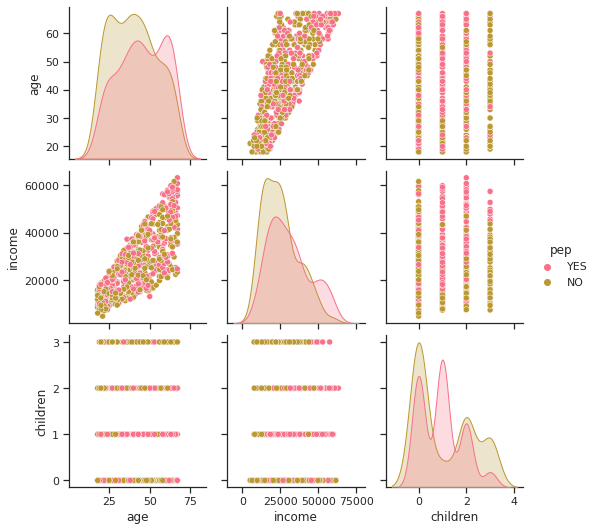

In [120]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(bank.iloc[:,0:12],hue="pep")

In [121]:
#shape of datasets 
print ("Dataset Shape: ", bank.shape) 
bank.describe()

Dataset Shape:  (600, 11)


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


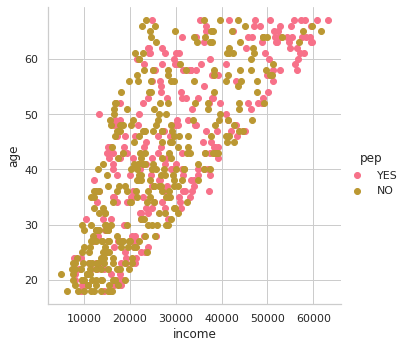

In [122]:
sns.set_style('whitegrid')
g = sns.FacetGrid(bank, hue = 'pep', size = 5)
g.map(plt.scatter,'income','age')
g.add_legend()
plt.show()

In [123]:
# Reading the Iris.csv file
X = bank.iloc[:,0:10].values
y = bank.iloc[:,10].values # attribute 10 is label data

In [124]:
# Import Library for splitting data
from collections import Counter
from sklearn.model_selection import train_test_split
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(450, 10) (150, 10) (450,) (150,)
Counter({'NO': 235, 'YES': 215})
Counter({'NO': 91, 'YES': 59})


In [125]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8333333333333334


In [126]:
#show confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[76 15]
 [10 49]]


In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.88      0.84      0.86        91
         YES       0.77      0.83      0.80        59

    accuracy                           0.83       150
   macro avg       0.82      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



[Text(0.765625, 0.9615384615384616, 'X[3] <= 51291.801\ngini = 0.499\nsamples = 450\nvalue = [235, 215]'),
 Text(0.5565664556962026, 0.8846153846153846, 'X[5] <= 1.5\ngini = 0.495\nsamples = 419\nvalue = [230, 189]'),
 Text(0.32199367088607594, 0.8076923076923077, 'X[5] <= 0.5\ngini = 0.498\nsamples = 275\nvalue = [128, 147]'),
 Text(0.15664556962025317, 0.7307692307692307, 'X[4] <= 0.5\ngini = 0.475\nsamples = 178\nvalue = [109, 69]'),
 Text(0.06329113924050633, 0.6538461538461539, 'X[9] <= 0.5\ngini = 0.437\nsamples = 62\nvalue = [20, 42]'),
 Text(0.0379746835443038, 0.5769230769230769, 'X[3] <= 16479.6\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.02531645569620253, 0.5, 'X[0] <= 32.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.012658227848101266, 0.4230769230769231, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.0379746835443038, 0.4230769230769231, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.05063291139240506, 0.5, 'gini = 0.0\nsamples = 22\nva

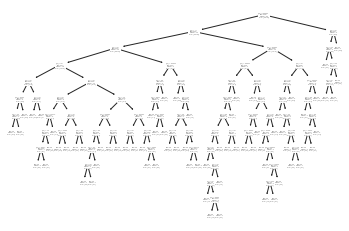

In [128]:
# Generating the decision tree graph
from sklearn import tree
tree.plot_tree(clf)

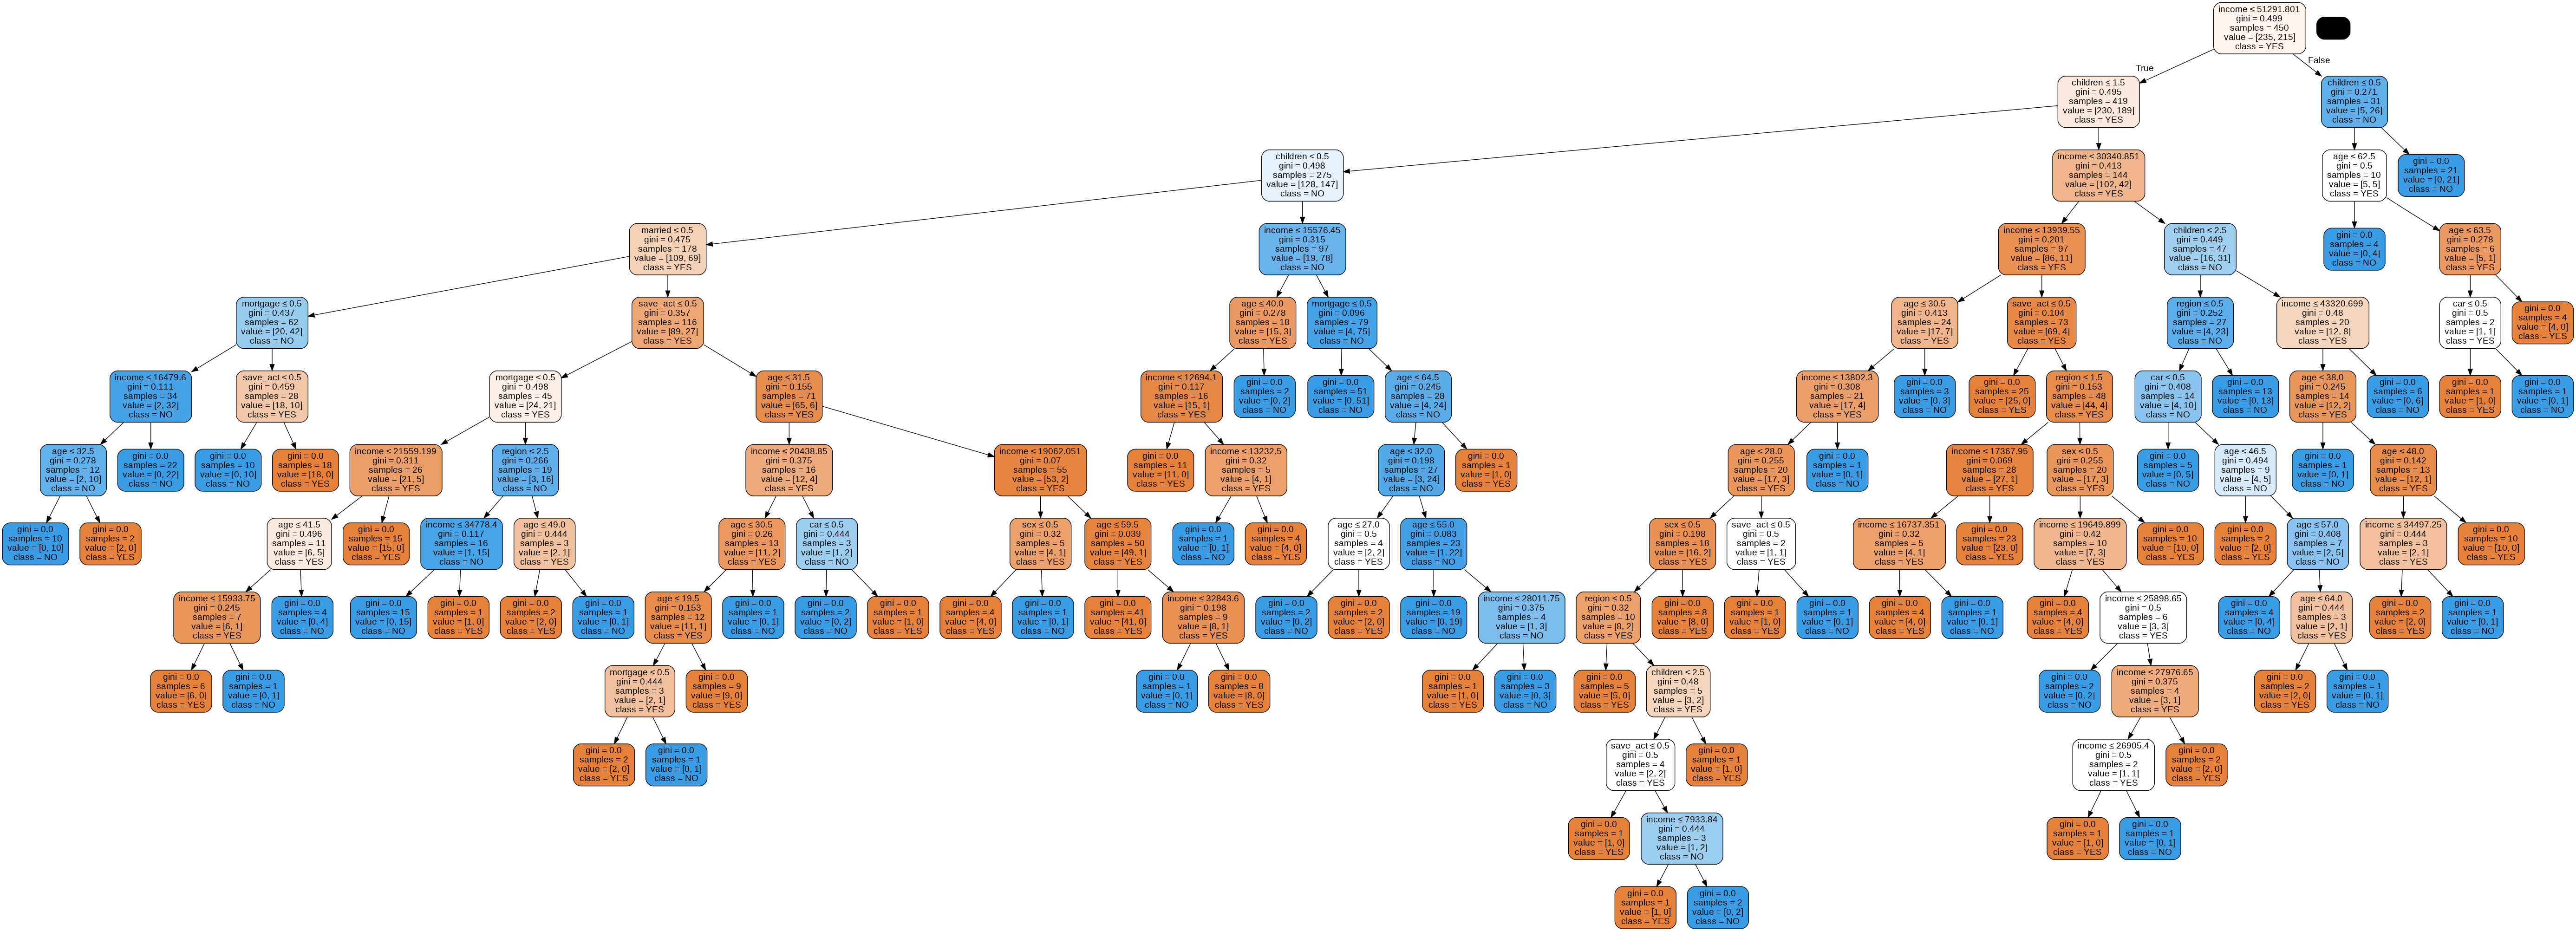

In [129]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['age', 'sex', '	region','income','married','children','	car','save_act','current_act','mortgage']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['YES','NO'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank.png')
Image(graph.create_png())

In [130]:
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0)
decision_tree = clf.fit(X_train,y_train)
rules = export_text(decision_tree, feature_names=feature_cols)
print(rules)

|--- income <= 51291.80
|   |--- children <= 1.50
|   |   |--- children <= 0.50
|   |   |   |--- married <= 0.50
|   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |--- income <= 16479.60
|   |   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- income >  16479.60
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- mortgage >  0.50
|   |   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- save_act >  0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |--- married >  0.50
|   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |   |--- income <= 21559.20
|   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |--- income <= 15933.75
|   |   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |   |--

In [131]:
Y_pred=clf.predict(X_test)
print(Y_pred) 

['YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO']


***Unseen Data***

In [141]:
X=[[20,1,1,15000,1,1,1,1,1,1],[40,0,0,12000,1,1,1,1,0,1],[13,0,0,55000,0,1,1,0,0,0]]  
Y_pred=clf.predict(X)
print(Y_pred) 

['NO' 'NO' 'YES']
